In [173]:
import pandas as pd
import numpy as np
from datetime import datetime


In [153]:
# create the date range
date_rng = pd.date_range(start='01/01/2021', end='05/01/2021', freq='H')
#date_rng

In [178]:
# create a data frame, use the date range to create it
df = pd.DataFrame(date_rng, columns=['date'])

# fill with random data

# random value between 0 and 100

df['value'] = np.random.random(size=(len(date_rng)))*100
# add a datetime column that will be of type datetime
df['datetime'] = pd.to_datetime(df['date'])

# convert to iso timestamp format
df['timestamp'] = df['datetime'].apply(datetime.isoformat,1)
# now make this column the index of the data frame
df = df.set_index('datetime')
# now the date column is not needed any more
df.drop(['date'], axis=1, inplace=True)

df



,value,timestamp
datetime,,
2021-01-01 00:00:00,3.741239,2021-01-01T00:00:00
2021-01-01 01:00:00,57.213687,2021-01-01T01:00:00
2021-01-01 02:00:00,88.437942,2021-01-01T02:00:00
2021-01-01 03:00:00,44.970697,2021-01-01T03:00:00
2021-01-01 04:00:00,3.929424,2021-01-01T04:00:00
...,...,...
2021-04-30 20:00:00,90.705914,2021-04-30T20:00:00
2021-04-30 21:00:00,8.585706,2021-04-30T21:00:00
2021-04-30 22:00:00,47.633071,2021-04-30T22:00:00


In [179]:
# print the type of the date column
#df.dtypes

# print first lines of data frame
#df.head(5)

# print a range of elements
#for i in range(2,6):
#    print(df.index[i].hour)
#df.index[25].hour

for index, element in df.iterrows():
    # between 22:00 and 06:00 - minimum activity
    if (index.hour >22 or index.hour <6):
        element['value']=np.random.random()*10
    # between 06:00 and 08:00, 20:00-22:00 - slightly more
    if ((index.hour >=20 and index.hour <22) or (index.hour >=6 and index.hour <8)):
        element['value']=np.random.random()*20
    print(index,element)


2021-01-01 00:00:00 value                   8.448073
timestamp    2021-01-01T00:00:00
Name: 2021-01-01 00:00:00, dtype: object
2021-01-01 01:00:00 value                   7.135918
timestamp    2021-01-01T01:00:00
Name: 2021-01-01 01:00:00, dtype: object
2021-01-01 02:00:00 value                   6.159617
timestamp    2021-01-01T02:00:00
Name: 2021-01-01 02:00:00, dtype: object
2021-01-01 03:00:00 value                   8.780617
timestamp    2021-01-01T03:00:00
Name: 2021-01-01 03:00:00, dtype: object
2021-01-01 04:00:00 value                   7.049903
timestamp    2021-01-01T04:00:00
Name: 2021-01-01 04:00:00, dtype: object
2021-01-01 05:00:00 value                   4.287217
timestamp    2021-01-01T05:00:00
Name: 2021-01-01 05:00:00, dtype: object
2021-01-01 06:00:00 value                  14.280418
timestamp    2021-01-01T06:00:00
Name: 2021-01-01 06:00:00, dtype: object
2021-01-01 07:00:00 value                   2.968261
timestamp    2021-01-01T07:00:00
Name: 2021-01-01 07:00:00

In [188]:
# a clear exception
print(df['value']['2021-01-30 02:00:00'])
df['value']['2021-01-30 02:00:00']=300.0
print(df['value']['2021-01-30 02:00:00'])


70.8273755762315
300.0


<ipython-input-188-2a6b0154f301>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value']['2021-01-30 02:00:00']=300.0
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='datetime'>

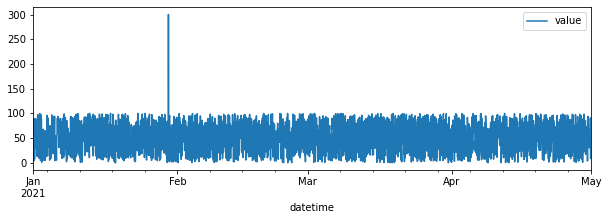

In [189]:
df.plot(figsize=(10,3))

In [191]:
df.to_csv("../DATA/test1.csv",columns=['timestamp','value'],index=False)